In [35]:
import random as rd
import numpy as np
import math
import matplotlib.pyplot as plt

## I) Simulation des lois 

###  &nbsp;&nbsp;&nbsp; 1) Simuler selon f_norm : méthodes de rejet

In [44]:
def f_norm(x,x0,b,sigma,delta):
    """f_norm est la loi selon  laquelle on doit simuler pour obtenir Pnorm"""
    ind= (x >= 0) & (x <= b)
    return ind*(np.exp(-((x - x0)**2) / (2 * sigma**2)) * (1 + np.cos(2*np.pi*(x - x0)/delta)**2))
 

In [38]:
def echantillon_f_norm(x0,b,sigma,delta,n):
    
    """ x0 : constante 
    b : constante positive
    sigma : constante positive
    delta : constante positive 
    n : constante taille de l'échantillon

    Simule un échantillon de taille n selon f_norm grâce à la méthode du rejet (version1)"""
    
    res=[]
    while len(res) < n:
        X = np.random.uniform(0, b)   # f_norm est nulle en dehors de [0,b]
        Y = np.random.uniform(0, M)
        if Y <= f_norm(X,x0,b,sigma,delta):
            res.append(X) #condition d'acceptation
    return res
    

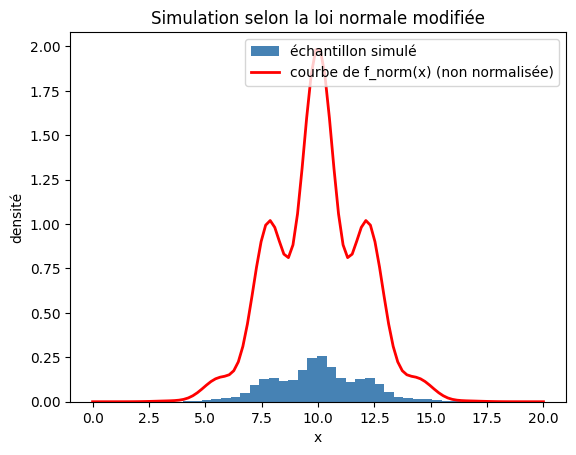

In [40]:
# Définition de paramètres pour vérifier graphiquement 
x0 = 10
b = 20
sigma = 2
delta = 5
M = 2
n = 100000
ech = echantillon_f_norm(x0, b, sigma, delta, n)
x_grid = np.linspace(0, b,100)

plt.hist(ech, bins=40, density=True,color='steelblue', label='échantillon simulé')
plt.plot(x_grid, f_norm(x_grid,x0,b,sigma,delta), 'r', lw=2, label='courbe de f_norm(x) (non normalisée)')
plt.title("Simulation selon la loi normale modifiée")
plt.xlabel("x")
plt.ylabel("densité")
plt.legend()


Cette première méthode nous permet d'obtenir un coût moyen M * b ici M=2 donc C=2*b
Conscients que nous pouvons choisir b grand (et donc avoir un coût élevé), nous décidons en parallèle d'implémenter la deuxième méthode de rejet : par rapport à la loi normale. En effet : la loi normale étant proche de la loi normale 'modifiée' nous pouvons espérer un coût faible car il y aura un meilleur taux d'acceptation.

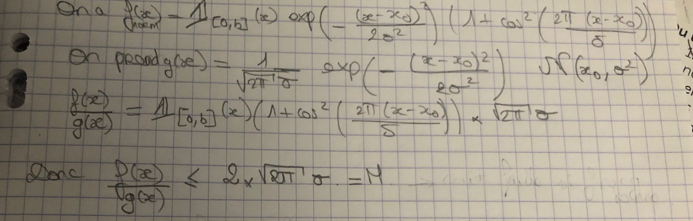

In [42]:
def g(x,x0,sigma):
    """ densité d'une loi normale de paramètre (x0,sigma)"""
    return (1 / (np.sqrt(2*np.pi)*sigma)) * np.exp(-((x - x0)**2) / (2 * sigma**2))

def echantillon_f_norm_opt(x0,b,sigma,delta,n):
    
    """ x0 : constante 
    b : constante positive
    sigma : constante positive
    delta : constante positive 
    n : constante taille de l'échantillon

    Simule un échantillon de taille n selon f_norm grâce à la méthode du rejet (version2)"""
    M=2*np.sqrt(2*np.pi)*sigma
    res=[]
    while len(res) < n:
        X = np.random.normal(x0, sigma)   
        Y = np.random.uniform(0, M)
        if Y*g(X,x0,sigma) <= f_norm(X,x0,b,sigma,delta):
            res.append(X) #condition d'acceptation
    return res
    

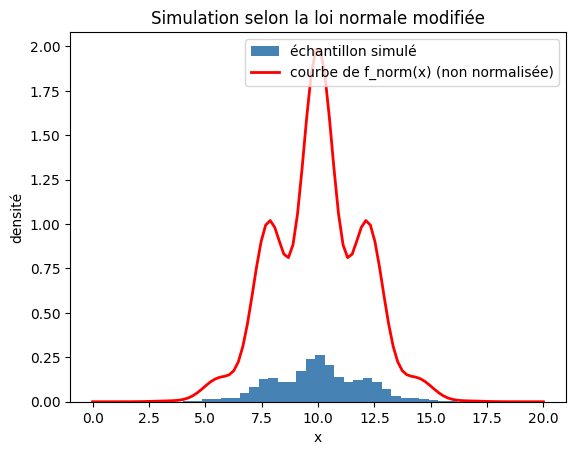

In [43]:
#on reprend les mêmes paramètres que précédemment
ech = echantillon_f_norm_opt(x0, b, sigma, delta, n)
x_grid = np.linspace(0, b,100)

plt.hist(ech, bins=40, density=True,color='steelblue', label='échantillon simulé')
plt.plot(x_grid, f_norm(x_grid,x0,b,sigma,delta), 'r', lw=2, label='courbe de f_norm(x) (non normalisée)')
plt.title("Simulation selon la loi normale modifiée")
plt.xlabel("x")
plt.ylabel("densité")
plt.legend()